# Machine Learning e Imágenes en Python

### Binarización: Clasificación dentro de una imagen en 2 clases, utilizando una variable: intensidad

Cargar en la notebook utilizando la librería OpenCV una imagen de manera monocroma que contenga un objeto claro u oscuro a destacar del fondo y luego:

* Binarizar la imagen por umbralado de la intensidad (utilizar el histograma de ser necesario para la elección del umbral), buscando separar el objeto deseado del fondo (unos, 255 o True en el objeto y ceros o False en el fondo).
* Mejorar la binarización con un filtro morfológico que crea adecuado.
* Encontrar los bordes del objeto utilizando operaciones morfológicas o gradiente morfológico.

Intensidades de la imagen monocroma:


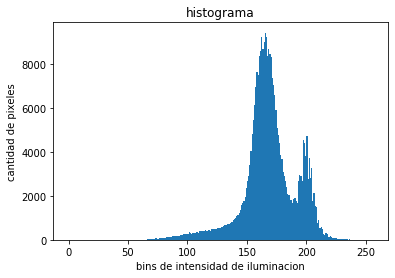

Elegimos un umbral de 180 para binarizar:


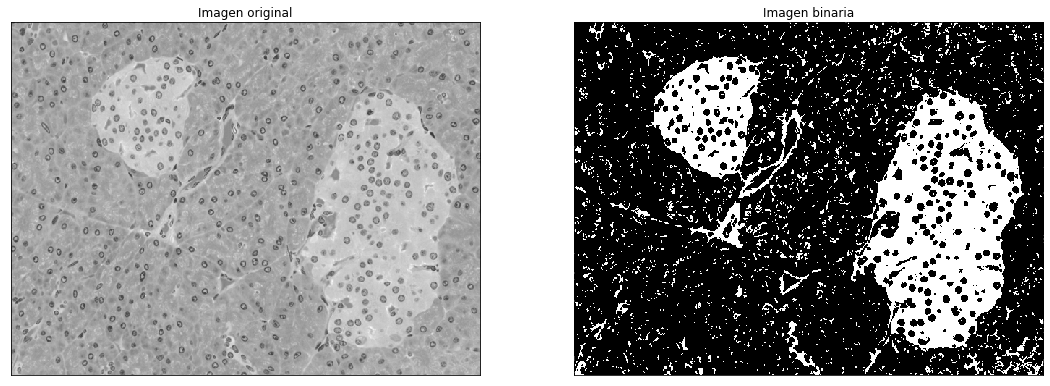

Aplicamos filtros de mediana y morfológicos:


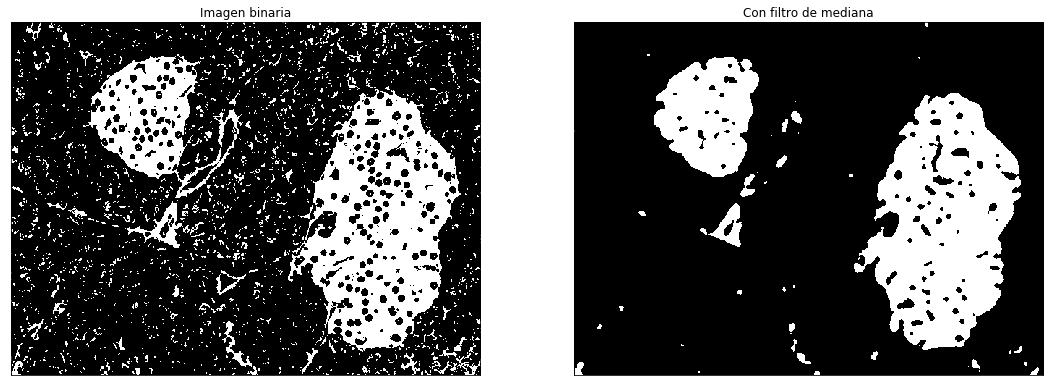

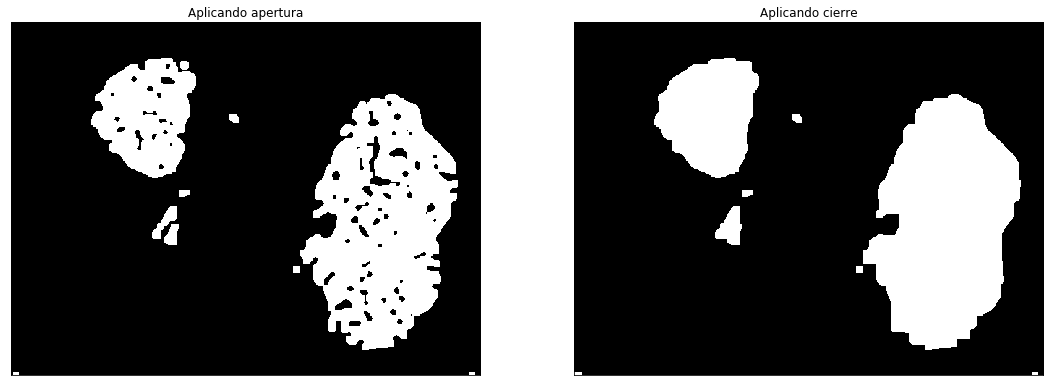

Imagen original vs resultado obtenido luego del procesamiento:


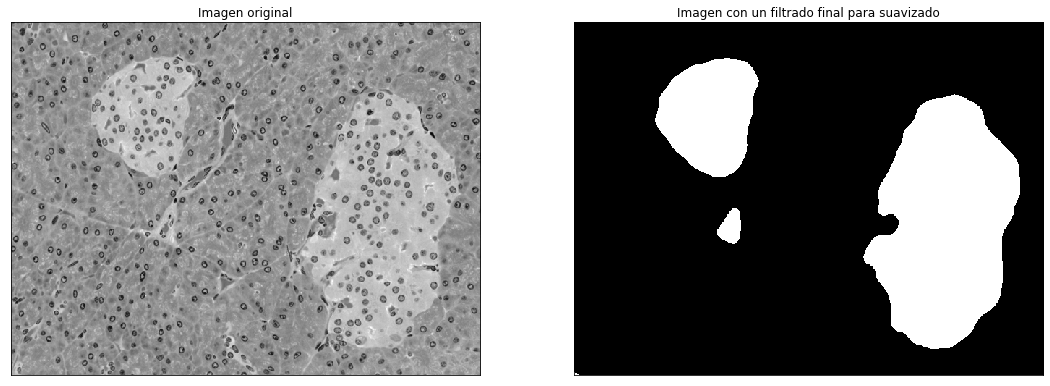

Bordes del área resaltada:


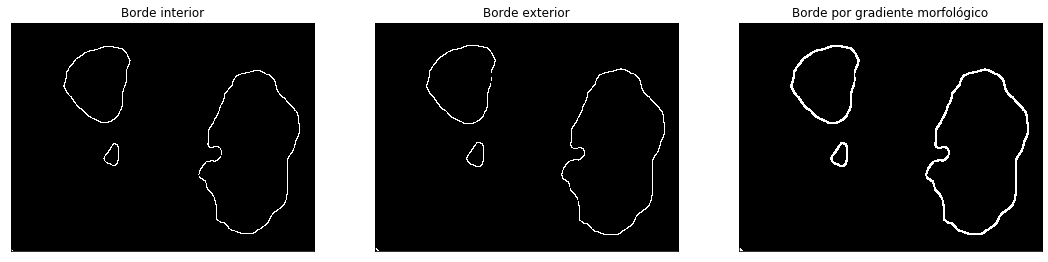

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Cargo imagen monocroma
img = cv2.imread('pancreas.jpg',0)

#Histograma
print('Intensidades de la imagen monocroma:')
plt.hist(img.ravel(), 256,[0,256] )
plt.title('histograma'), plt.xlabel('bins de intensidad de iluminacion'), plt.ylabel('cantidad de pixeles')
plt.show()

#Binarizado
umbral=180
ret1,binaria = cv2.threshold(img,umbral,255,cv2.THRESH_BINARY)

#Grafico
print('Elegimos un umbral de 180 para binarizar:')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(121),plt.imshow(img,cmap='gray',vmin=0,vmax=255),plt.title('Imagen original'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(binaria,cmap='gray',vmin=0,vmax=255),plt.title('Imagen binaria'),plt.xticks([]), plt.yticks([])
plt.show()

#Filtro de la mediana para eliminar ruido:
median = cv2.medianBlur(binaria,11) 

#Grafico
print('Aplicamos filtros de mediana y morfológicos:')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(121),plt.imshow(binaria,cmap='gray',vmin=0,vmax=255),plt.title('Imagen binaria'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median,cmap='gray',vmin=0,vmax=255),plt.title('Con filtro de mediana'),plt.xticks([]), plt.yticks([])
plt.show()

#Apertura para elminiar puntos externos y cierre para rellenar regiones:
kernel = np.ones((8,8),np.uint8)
kernel2 = np.ones((15,15),np.uint8)
apertura = cv2.morphologyEx(median, cv2.MORPH_OPEN, kernel)
cierre = cv2.morphologyEx(apertura, cv2.MORPH_CLOSE, kernel2)

#Grafico
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(1,2,1),plt.imshow(apertura,cmap='gray'),plt.title('Aplicando apertura'),plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(cierre,cmap='gray'),plt.title('Aplicando cierre'),plt.xticks([]), plt.yticks([])
plt.show()

#filtrado final para suavizar bordes y eliminar ruido residual:
median2 = cv2.medianBlur(cierre,19) #filtro de la mediana

#Grafico
print('Imagen original vs resultado obtenido luego del procesamiento:')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(1,2,1),plt.imshow(img,cmap='gray'),plt.title('Imagen original'),plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(median2,cmap='gray',vmin=0,vmax=255),plt.title('Imagen con un filtrado final para suavizado'),plt.xticks([]), plt.yticks([])
plt.show()

#Ubicación de los bordes del objeto utilizando operaciones morfológicas o gradiente morfológico
kernel = np.ones((5,5),np.uint8) #elemento estructurante
erosion = cv2.erode(median2,kernel,iterations = 1)
dilatacion = cv2.dilate(median2,kernel,iterations = 1)
gradiente=cv2.morphologyEx(median2,cv2.MORPH_GRADIENT,kernel)

#Grafico
print('Bordes del área resaltada:')
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.subplot(1,4,2),plt.imshow(median2-erosion,cmap='gray'),plt.title('Borde interior'),plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3),plt.imshow(dilatacion-median2,cmap='gray'),plt.title('Borde exterior'),plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4),plt.imshow(gradiente,cmap='gray'),plt.title('Borde por gradiente morfológico'),plt.xticks([]), plt.yticks([])
plt.show()